In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [61]:
runs_dir = '../runs'
runs = [os.path.join(runs_dir, d) for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d))]
results = [os.path.join(d, "results.csv") for d in runs if os.path.exists(os.path.join(d, 'results.csv'))]
results

['../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707752094/results.csv',
 '../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707754065/results.csv',
 '../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707751216/results.csv',
 '../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707757368/results.csv',
 '../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707756215/results.csv',
 '../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707753055/results.csv',
 '../runs/MineFieldEnv-v0__minigrid-test-ppo__1__1707755126/results.csv']

In [62]:
dfs = [pd.read_csv(r) for r in results]
dfs[2]

,# Total Parameters,# Total Neurons,Model Summary,Environment,Wall Density,Use Lava,Average Test Reward
0,220056,220056,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.741025
1,426936,426936,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.607950
2,840696,840696,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.646200
3,222632,222632,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.641812
4,431560,431560,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.720000
5,849416,849416,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.671625
6,227784,227784,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.300187
7,440808,440808,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.553737
8,866856,866856,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",MineFieldEnv-v0,0.1,False,0.633275
9,220672,220672,"Sequential(\n (0): Conv2d(3, 16, kernel_size=...",MineFieldEnv-v0,0.1,False,0.562388


In [63]:
combined_df = pd.concat(dfs, ignore_index=True)
average_rewards = combined_df.groupby(['# Total Parameters', 'Wall Density'])['Average Test Reward'].mean().reset_index()
pivoted_data = average_rewards.pivot(index='Wall Density', columns='# Total Parameters', values='Average Test Reward')

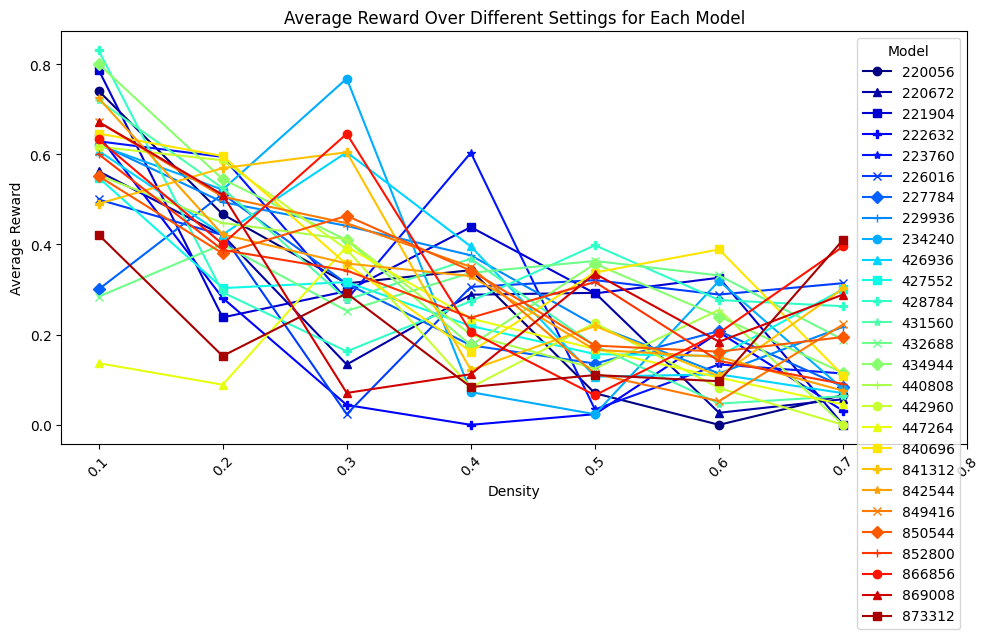

In [79]:
import itertools
import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))

cmap = plt.cm.jet
norm = mcolors.Normalize(vmin=0, vmax=len(combined_df['# Total Parameters'].unique()))

markers = itertools.cycle(['o', '^', 's', 'P', '*', 'x', 'D', '+'])
for i, column in enumerate(pivoted_data.columns):
    plt.plot(pivoted_data[column].index.values,
             pivoted_data[column].values,
             marker=next(markers),
             label=column,
             color=cmap(norm(i)))

plt.title('Average Reward Over Different Settings for Each Model')
plt.xlabel('Density')
plt.ylabel('Average Reward')
settings = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
plt.xticks(settings, rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

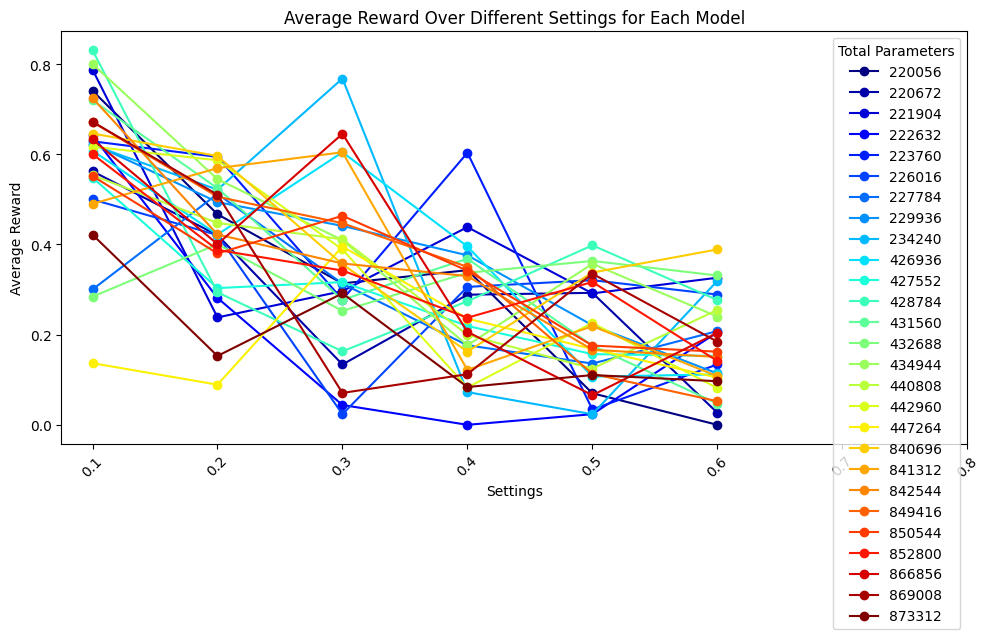

In [52]:
pivoted_data.plot(kind='line', marker='o', figsize=(10, 6), cmap=plt.cm.jet)
plt.title('Average Reward Over Different Settings for Each Model')
plt.xlabel('Settings')
plt.ylabel('Average Reward')
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8], rotation=45)
plt.legend(title='Total Parameters')
plt.tight_layout()
plt.show()